# Linear Algebra

In [12]:
#importing libraries
import numpy
import numpy as np
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import matplotlib.image

#setting printout precision
np.set_printoptions(suppress=False)

## Singlular Value Decomposition
* The **singular value decomposition (SVD)** of a matrix allows a matrix to be represented as a product of three *special* matrices
* If $A$ is an $m \times n$ matrix, then we can rewrite it as the product \begin{equation} A = U_{m\times m} \cdot S_{m \times n} \cdot V_{n \times n} \end{equation} where $U$ and $V$ are orthogonal matrices, while $S$ is a diagonal matrix.

## Calculating the SVD of a matrix

In [15]:
# With numbers: prime factorization --> 30 = 2*3*5
# creating the matrix A
A = np.arange(12).reshape(4, 3)

print('A = \n', A)

# getting the SVD: numpy.linalg.svd()
U, S, V = nla.svd(A)

print('U = \n', U)

print('S = \n', S) # this one is given as an array, not a matrix

print('V = \n', V)

print('U.dot(U.T) = \n', U.dot(U.T))
print('V.dot(V.T) = \n', V.dot(V.T))

# check if it really works
# Step 1: Create a diagonal verson of S
S_1 = np.zeros([4, 3])
np.fill_diagonal(S_1, S)
print('S_1 = \n', S_1)

# Step 2: Multiply and print
A_rec = U @ S_1 @ V

#are A and A_rec equal?
np.allclose(A, A_rec)

A = 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
U = 
 [[-0.08351795  0.83248108  0.49783102  0.22839499]
 [-0.31365087  0.44902465 -0.83401027  0.06653468]
 [-0.54378379  0.06556821  0.17452748 -0.81825434]
 [-0.77391671 -0.31788823  0.16165177  0.52332466]]
S = 
 [2.24467488e+01 1.46405850e+00 7.16240196e-16]
V = 
 [[-0.49757343 -0.57397065 -0.65036788]
 [-0.76534569 -0.06237807  0.64058954]
 [-0.40824829  0.81649658 -0.40824829]]
U.dot(U.T) = 
 [[ 1.00000000e+00  1.66533454e-16  2.22044605e-16  2.22044605e-16]
 [ 1.66533454e-16  1.00000000e+00  1.31838984e-16 -1.94289029e-16]
 [ 2.22044605e-16  1.31838984e-16  1.00000000e+00  5.55111512e-17]
 [ 2.22044605e-16 -1.94289029e-16  5.55111512e-17  1.00000000e+00]]
V.dot(V.T) = 
 [[ 1.00000000e+00  6.98854140e-17  9.36673081e-17]
 [ 6.98854140e-17  1.00000000e+00 -2.51772245e-18]
 [ 9.36673081e-17 -2.51772245e-18  1.00000000e+00]]
S_1 = 
 [[2.24467488e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.46405850e+00 0.00000000e+00]


True

In [ ]:
# Tougher example: Hilbert's Matrix 
order = 
H = np.zeros()



print('H = \n', H)


# getting the SVD


print('U = \n', U)

print('S = \n', S) # this one is given as an array, not a matrix

print('V = \n', V)


# check if it really works
# Step 1: Create a diagonal verson of S


# Step 2: Multiply and print



## Low-rank SVD approximation
* Instead using the full matrices $U$, $S$ and $V$ for reconstruction of the original matrix (this is pointless), we can *approximate* the original matrix with **less information**
* The advantage of this is that we will be using less memory to store the data, and, additionally -- eliminate any *noise* that the data might contain (essentially, we will be cleaning up possibly garbled data)
* The approximation is called **low-rank SVD approximation**
* The approximation of order $k$ uses only the first $k$ columns of $U$, the first (largest) $k$ singular values from $S$, and the first $k$ rows of $V$.

In [27]:
# Construct the rank 2 approximation to A

# Getting the 2 rows, columns
k = 2
U_k = U[:, :k]
S_k = np.zeros([k, k])
np.fill_diagonal(S_k, S[:k])
V_k = V[:k, :]

print('U_k = \n', U_k)
print('S_k = \n', S_k)
print('V_k = \n', V_k)


#Constructing the approximation: A_k
A_k = U_k @ S_k @ V_k
print('A_k = \n', A_k)
print('Discrepancy = ', nla.norm(A - A_k, 2)) #Frobenius

U_k = 
 [[-0.08351795  0.83248108]
 [-0.31365087  0.44902465]
 [-0.54378379  0.06556821]
 [-0.77391671 -0.31788823]]
S_k = 
 [[22.44674882  0.        ]
 [ 0.          1.4640585 ]]
V_k = 
 [[-0.49757343 -0.57397065 -0.65036788]
 [-0.76534569 -0.06237807  0.64058954]]
A_k = 
 [[-1.11022302e-16  1.00000000e+00  2.00000000e+00]
 [ 3.00000000e+00  4.00000000e+00  5.00000000e+00]
 [ 6.00000000e+00  7.00000000e+00  8.00000000e+00]
 [ 9.00000000e+00  1.00000000e+01  1.10000000e+01]]
Discrepancy =  7.59805039110688e-15


## Example: image compression
* Since images are matrices, low-rank SVD approximation can be applied to filtering and compressing images
* For simplicity, the images are converted into grayscale coloring

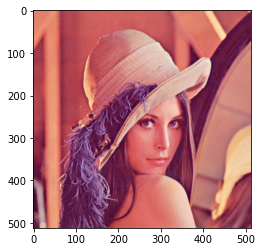

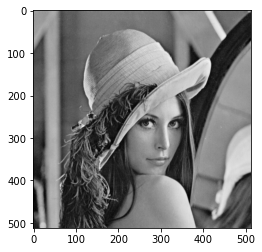

(512, 512)

In [50]:
# Load the image
img = matplotlib.image.imread('lena.png')

# show the image
plt.figure()
plt.imshow(img)
plt.show()

# convert to grayscale and show
def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return rgb[...].dot([0.2989, 0.5870, 0.1140])

img_gs = rgb2gray(img)

plt.figure()
plt.imshow(img_gs, cmap = 'gray')
plt.show()
matplotlib.image.imsave('lena_grayscale.png', img_gs, cmap = 'gray')

img_gs.shape

In [35]:
# Show the matrix of the image
k = 5
img_gs[:k, :k]

array([[0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512]])

In [36]:
# Perform SVD decomposition
U, S, V = nla.svd(img_gs)

print('U = \n', U)

print('S = \n', S) # this one is given as an array, not a matrix

print('V = \n', V)

U = 
 [[-4.73302893e-02  2.78845469e-02 -1.52885491e-02 ... -8.64486197e-02
   5.40481861e-17  7.90117313e-01]
 [-4.73302893e-02  2.78845469e-02 -1.52885491e-02 ...  6.53043965e-02
  -2.47004283e-18  1.91190472e-01]
 [-4.73302893e-02  2.78845469e-02 -1.52885491e-02 ... -5.39339807e-01
  -3.54545751e-17 -2.89872277e-01]
 ...
 [-4.16739200e-02  4.85567257e-02  2.18332065e-02 ...  8.62504512e-15
   4.74161693e-17 -2.14411822e-14]
 [-4.17297653e-02  4.80714845e-02  2.02820030e-02 ...  9.71445147e-16
  -7.07106781e-01 -1.00752739e-14]
 [-4.17297653e-02  4.80714845e-02  2.02820030e-02 ...  9.57567359e-16
   7.07106781e-01 -1.00752739e-14]]
S = 
 [2.53827139e+02 4.15502475e+01 3.20565282e+01 2.53924184e+01
 2.30684904e+01 2.17710106e+01 1.79905247e+01 1.60487962e+01
 1.32340496e+01 1.24433544e+01 1.04790052e+01 9.60207321e+00
 9.43099266e+00 9.11959090e+00 8.55368222e+00 8.43107371e+00
 8.18491305e+00 7.26983666e+00 6.81507365e+00 6.68516987e+00
 6.42044862e+00 6.22350164e+00 5.68288716e+00 5

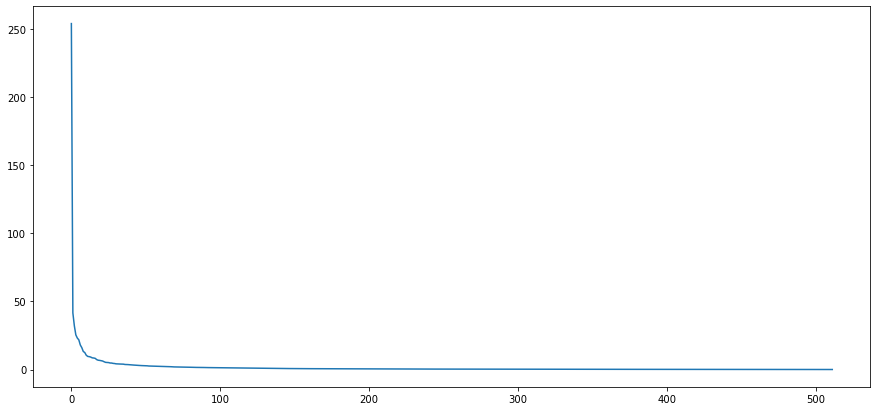

In [40]:
# Plotting the Singular Values
plt.figure(figsize=(15, 7))
plt.plot(S)
plt.show()

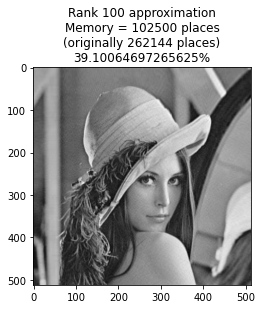

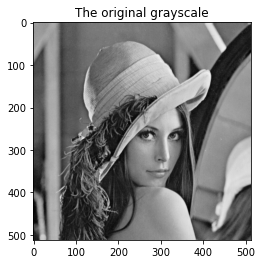

In [52]:
# Performing low-rank approximation
k = 100


#Constructing the approximation
U_k = U[:, :k]
S_k = np.zeros([k, k])
np.fill_diagonal(S_k, S[:k])
V_k = V[:k, :]

img_k = U_k @ S_k @ V_k

#Show the image
plt.figure()
plt.title(f'Rank {k} approximation\nMemory = {2*k*512 + 100} places\n(originally {512*512} places)\n{(2*k*512 + 100)/(512*512)*100}%')
plt.imshow(img_k, cmap='gray')
plt.show()
matplotlib.image.imsave('lena_k.png', img_k, cmap = 'gray')

plt.figure()
plt.title('The original grayscale')
plt.imshow(img_gs, cmap = 'gray')
plt.show()

In [ ]:
# Principal Component Analysis - PCA
# Dimensionality reduction
# Eigendecomposition (eigenvalues, eigenvectors) -- only for square matrices

## Practice
* Write a function which will display and save the k-th low-rank approximation to an image
* The input arguments are the image and the integer k, the output should be a file in an image format

In [ ]:
def k_svd_image(image, k):
    
    

In [ ]:
# Example input
k_svd_image('lena.png', 15)